# AIM 5001 Final Project Proposal

# Introduce
In today’s uncertain times, people are looking to data to help determine investment ways in confronting COVID-19. From mitigating risk to gaining essential insight, data helps drive decisions. I with my analytics between COVID-19 and Real estate price (NYC, Houston and Los Angeles) can help people make the decision. I think the U.S. housing markets are most vulnerable to the impact of the Coronavirus pandemic. 

The first dataset comes from kaggle [link:](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics). This dataset contains a daily updated number of reported COVID-19 cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University.

The second dataset comes from rapidapi [link:](https://rapidapi.com/apidojo/api/realtor) that has detailed real estate information that comes from Realtor. [link:](https://www.realtor.com/).

Through research questions, I want to analyze and illustrate correlations to COVID-19 and Housing markets as well as to response the followling questions that can help people make a buying housing decision.

The first question is does COVID-19 affects the price of the estate. To analyze it, I will choose the daily number of COVID-19 new cases and Price per Sq Ft. In this question, I will illustrate line chart to show the two data.

The second question is what types of houses have been most affected, Muti-family, Single-family, or Condos. I will compare the different types of houses.

Through data analysis, people not only can see the correlation between COVID-19 and Housing markets but also can make decisions about whether to buy a house or not to buy.

# Research Questions
For this final project, I want to study that does COVID-19 affect Real estate price, in NYC, Houston and Las Angeles? For this reason I chose the following questions.


1. Does COVID-19 affects the price of the estate?

In new york city, Many people left rented apartments during the COVID-19 pandemic and bought house property. Whether the increasing or decreasing price of the property is related to the pandemic? By analyzing two data of three main cities,(New York City, Houston, and Los Angeles), people can use results to make decisions to invest in real estate.

    
2. What types of houses have been most affected, Muti-family, Single-family, or Condos?

Because of COVID-19, the housing market has bloomed. People need bigger space to live with their family. Is it true that of all the types of property, only houses have gone up in price? Data analysis can help people find A valuable type of property to invest in?

# Data to be Used

I will use two datasets.

The first dataset is a daily updated number of reported COVID-19 cases & deaths in the US on the state, as provided by the Johns Hopkins University. The COVID-19 dataset covid_us_county.csv and Column Description can be found on page [link](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics). I will download the dataset as csv by python.

- COVID-19 data sample:

| fips | county | state | lat | long | date | cases | state_code | deaths|
| :--- | :--- | :--- | :--- |  :--- | :--- | :--- | :--- | :--- |
| 101 | Houston | Texas| 32.53952 | -86.64408 | 2020-01-22 | 0 | TX | 0 |
| 1001| Hudson | Texas| 32.53952745 | -86.64408227 | 2020-04-26 | 37 |  TX | 1 |


The second dataset is housing market data got from Realtor from rapidapi [link:](https://rapidapi.com/apidojo/api/realtor). After getting housing data, I will save them into the PostgreSql database.


- To get what type of data
    - To get 3 data of real estate of cities (NYC, Houston and Los Angeles).
    - To get 3 types of houses (Muti-family, Single-family, or Condos)
    - To get 30 items for each type of houses in each city.
    - To get houses history prices information.


- Houses data table sample:
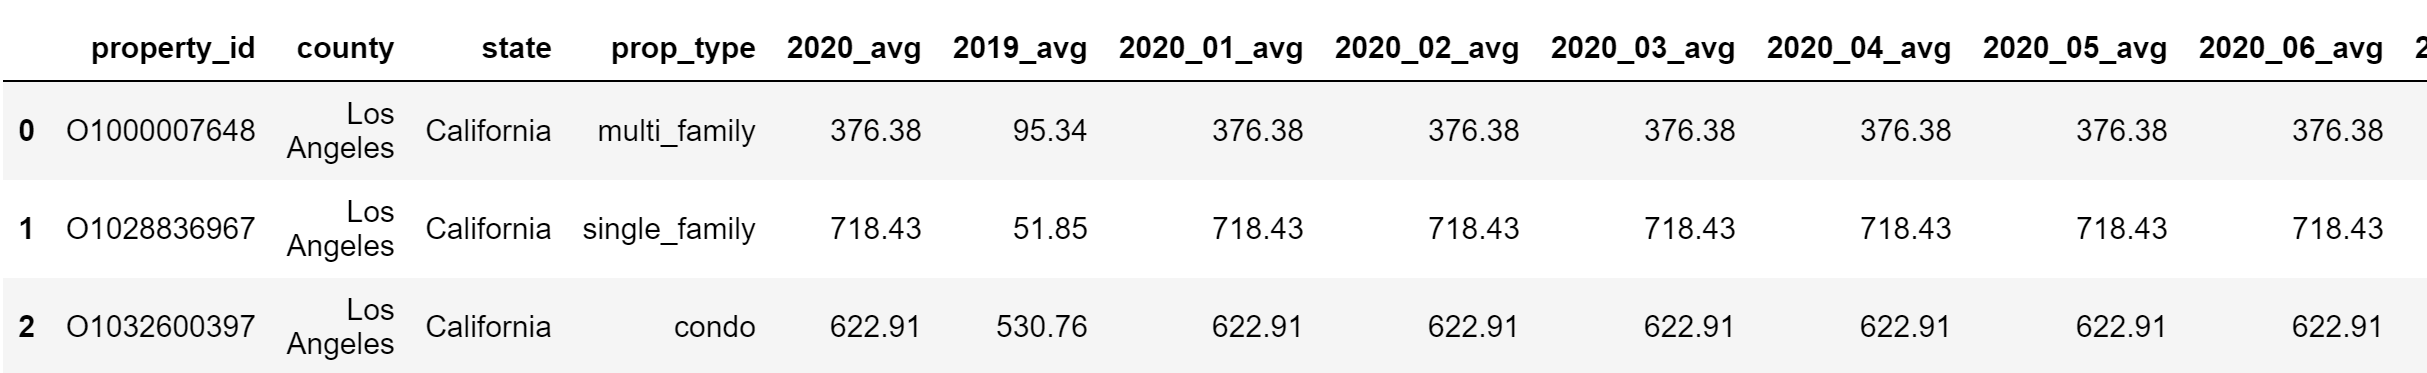

# Approach

- Data management
    - Using PostgreSQL databases to store the data of real estate.


- Statistical analysis
    - In the EDA part, I will use clearing data, description, hist chart and correlation to clean and realize these two dataset. In response to my pervious questions, I will choose appropriate columns to analyze.
    
    - To get a reasonable statistical analysis, I will choose appropriate columns and use appropriate figures to response my pervious questions.
        - Using line chart to illustrate the change of the columns for these 2 dataset. Like, to illustrate the new COVID-19 cases per day, and the average property price changes in the 3 cities. 
        - Using hist, box chart to show the concentration of Price/sqft.
        - Using bar chart to illustrate the change ratio of housing price.


- New feature
    - I want to draw a US map that shows the percentage of housing going up with different colors for 3 cities (NYC, Houston, and Los Angeles). The map lib is [link](https://pypi.org/project/folium/). For example, if NYC has the highest percentage of property increases in 3 cities, the map of NYC will show red.

# Reference
www.kaggle.com. COVID-19 US County JHU Data & Demographics. [online] Available at:https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics [Accessed 13 November 2020].


https://pypi.org/. folium 0.11.0 [online] Available at:https://pypi.org/project/folium/  https://python-visualization.github.io/folium/quickstart.html [Accessed 13 November 2020].


www.realtor.com/. Real estate online platform. [online] Available at:www.realtor.com/ [Accessed 13 November 2020].


https://magazine.realtor. A magazine of real estate. [online] Available at: https://magazine.realtor/news-and-commentary/feature/covid-19-s-impact-on-real-estate [Accessed 13 November 2020].

www.rapidapi.com/. API of Real estate [link:](https://rapidapi.com/apidojo/api/realtor) [Accessed 13 December 2020].

In [1]:
# first import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import branca
import json
import requests

# Data Summary

# COVID_19

In [2]:
# To read the COVID-19 data from github and get the DataFrame.
covid_file = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/covid_us_county.csv"
# covid_file = r"D:\yeshiva\1 semester\Data Acquisition and Management CRN 13255\Final Project/covid_us_county.csv"
covid_all_df = pd.read_csv(covid_file)

# To see the head of data set
covid_all_df.head(3)

,fips,county,state,lat,long,date,cases,state_code,deaths
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0


The United States have recently become the country with the most reported cases of 2019 Novel Coronavirus (COVID-19). This dataset contains daily updated number of reported cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University.

In [3]:
# To see the column names
covid_all_df.columns

Index(['fips', 'county', 'state', 'lat', 'long', 'date', 'cases', 'state_code',
       'deaths'],
      dtype='object')

### Then to choose three county(Houston, Los Angeles, New York) as sub dataset

In [4]:
# choose NYC, Houston, and Los Angeles
covid_3cities_df = covid_all_df[((covid_all_df.county == 'Houston') & (covid_all_df.state == 'Texas'))
                               | ((covid_all_df.county == 'Los Angeles') & (covid_all_df.state == 'California'))
                               | ((covid_all_df.county == 'New York') & (covid_all_df.state == 'New York'))]

In [5]:
# To see the sub-dataset size
covid_3cities_df.shape

(951, 9)

In [6]:
# To see the sub-dataset
covid_3cities_df.head(3)

,fips,county,state,lat,long,date,cases,state_code,deaths
67521,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-22,0,CA,0
67522,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-23,0,CA,0
67523,6037.0,Los Angeles,California,34.308284,-118.228241,2020-01-24,0,CA,0


In [7]:
covid_3cities_df.groupby('fips').mean()

,lat,long,cases,deaths
fips,,,,
6037.0,34.308284,-118.228241,136998.842271,3427.779180
36061.0,40.767273,-73.971526,23396.050473,2208.264984
48225.0,31.319260,-95.422262,197.845426,4.337539


### Then I'm going to calculate the COVID-19 daily cases.
Because the original COVID-19 data is a daliy cumulate cases, I also need a daily cases dataframe otherwise.

In [8]:
# to get the daily cases for 3 places
def get_daily_case():
    counties = ['Los Angeles', 'New York', "Houston"]
    
    dailys = {}
    for s in counties:
        ca_df = covid_3cities_df[covid_3cities_df['county'] == s ]
        diff_ca = np.diff(ca_df['cases'])
        all_daily_ca = np.append(ca_df['cases'][:1], diff_ca)
        
        dailys[s] = all_daily_ca
    
    # get index
    ca_df = covid_3cities_df[covid_3cities_df['county'] == counties[0] ]
    dates = ca_df['date']
    
    result_daily_df = pd.DataFrame(dailys, index=dates, columns=counties)
    return result_daily_df


covid_daily_cases_df = get_daily_case()

In [9]:
covid_daily_cases_df = covid_daily_cases_df.reset_index()
covid_daily_cases_df.head(3)

,date,Los Angeles,New York,Houston
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0


In [10]:
covid_daily_cases_df.describe()

,Los Angeles,New York,Houston
count,317.000000,317.000000,317.000000
mean,1330.854890,147.817035,1.829653
std,1342.831831,190.685318,16.851999
min,0.000000,0.000000,-197.000000
25%,396.000000,44.000000,0.000000
50%,1042.000000,68.000000,0.000000
75%,1814.000000,178.000000,2.000000
max,7696.000000,1737.000000,199.000000


In [11]:
# convert to a long table
covid_daily_cases_long_df = pd.melt(covid_daily_cases_df, id_vars=['date'])
covid_daily_cases_long_df = covid_daily_cases_long_df.rename(columns={"variable": "county", "value":"daily_cases"})
covid_daily_cases_long_df

,date,county,daily_cases
0,2020-01-22,Los Angeles,0
1,2020-01-23,Los Angeles,0
2,2020-01-24,Los Angeles,0
3,2020-01-25,Los Angeles,0
4,2020-01-26,Los Angeles,1
...,...,...,...
946,2020-11-29,Houston,2
947,2020-11-30,Houston,0
948,2020-12-01,Houston,0
949,2020-12-02,Houston,0


I get a COVID-19 daily cases dataframe.

### Selecting Appropriate Plots

I want to use the county and cases (The cumulative cases), so I will use line chart to show the cases of three counties

In [12]:
covid_3cities_df[['county', 'cases']].groupby('county').describe()

cases                                                       \
             count           mean            std  min      25%      50%   
county                                                                    
Houston      317.0     197.845426     184.181420  0.0      0.0    160.0   
Los Angeles  317.0  136998.842271  127682.117791  0.0   8443.0  97918.0   
New York     317.0   23396.050473   13752.386320  0.0  12722.0  28380.0   

                                 
                  75%       max  
county                           
Houston         364.0     580.0  
Los Angeles  255049.0  421881.0  
New York      32772.0   46858.0

### Using line char to illustrate daily COVID-19 cases of 3 counties

In [13]:
def get_x_names(dates):
    new_dates = []
    i = 0
    for index, value in dates.items():
        if i%25 == 0:
            new_dates.append(value)
        i += 1
    return new_dates

<Figure size 720x720 with 0 Axes>

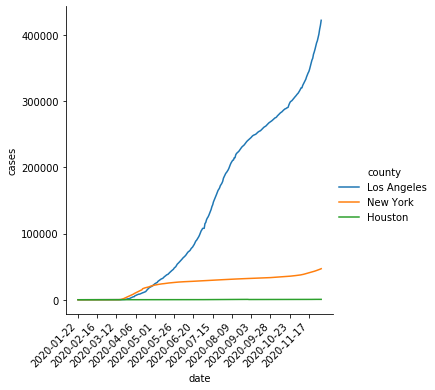

In [14]:
# to draw a line chart that can show the change of daily culmulate cases
plt.figure(figsize = (10, 10))
sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df);

dates = covid_3cities_df[covid_3cities_df.county == 'Los Angeles']['date']

new_dates = get_x_names(dates)

plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

The cumulate cases of Los Angeles has 421881. The figure for New York has 46858. Houston has the least cumulata cases in three places with 580.

<Figure size 720x720 with 0 Axes>

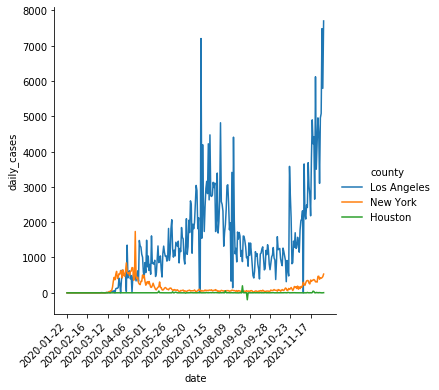

In [15]:
# to draw a line chart that can show the change of daily cases
plt.figure(figsize = (10, 10))
sns.relplot(x="date", y="daily_cases", hue="county", kind="line", data=covid_daily_cases_long_df);

dates = covid_daily_cases_long_df[covid_daily_cases_long_df.county == 'Los Angeles']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

We can see Los Angeles has the most cumulate cases in three counties. The number of cumulate cases in Houston is the least. Also, Los Angeles has two daily peaks in July and December with over 7000 and near 8000 respectively. The daily peak of New York is in May (over 1800). 

Bacase the cumulate number of Los Angeles has over 400,000, the line chart can not show the detail. I will draw line chart to illustrate three counties respectively.

<Figure size 720x720 with 0 Axes>

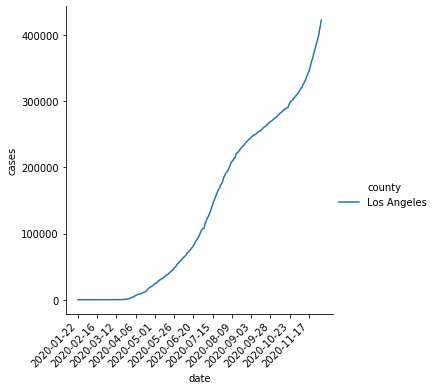

In [16]:
# to draw a line chart that can show the change of daily cases
plt.figure(figsize = (10, 10))

sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'Los Angeles']);

dates = covid_3cities_df[covid_3cities_df.county == 'Los Angeles']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

<Figure size 720x720 with 0 Axes>

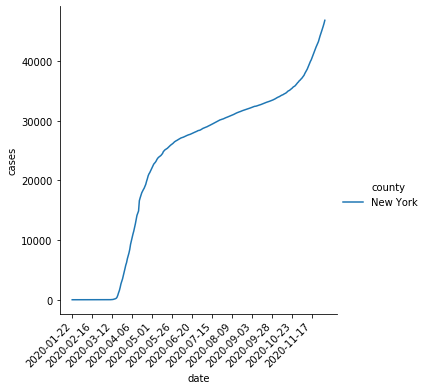

In [17]:
# to draw a line chart that can show the change of daily cases
plt.figure(figsize = (10, 10))

sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'New York']);

dates = covid_3cities_df[covid_3cities_df.county == 'New York']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

<Figure size 720x720 with 0 Axes>

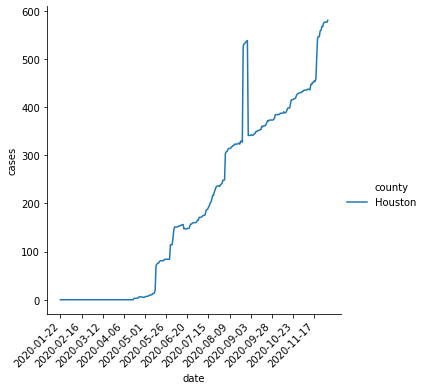

In [18]:
# to draw a line chart that can show the change of daily cases
plt.figure(figsize = (10, 10))

sns.relplot(x="date", y="cases", hue="county", kind="line", data=covid_3cities_df[covid_3cities_df.county == 'Houston']);

dates = covid_3cities_df[covid_3cities_df.county == 'Houston']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

From the above description and charts, we can see that the number of COVID-19 cases of Los Angeles and Houston has increased rapidly after May of 2020. the number of COVID-19 cases of New York City has increased rapidly after the late March.

The cumulative cases of Los Angeles has over 400,000. In contract, the cumulative cases of Houston has around 600. New York has over 46000 cases.

# Data of Housing price
- To get data from API, I use other notebook to do it. I update the csv file to Github.
- To use the csv file to be the house data.

In [19]:
# To read the house data from github and get the DataFrame.
house_3cities_file = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/final_house_3cities.csv"

house_avg_df = pd.read_csv(house_3cities_file)

# To see the head of data set
house_avg_df.head(3)

,Unnamed: 0,property_id,county,state,prop_type,2020_avg,2019_avg,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
0,0,O1000007648,Los Angeles,California,multi_family,376.38,95.34,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,378.63,378.63
1,1,O1028836967,Los Angeles,California,single_family,718.43,51.85,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,722.56,722.56
2,2,O1032600397,Los Angeles,California,condo,622.91,530.76,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,613.34,613.34


In [20]:
# drop the Unnamed: 0
house_avg_df = house_avg_df.drop(['Unnamed: 0'], axis=1)

In [21]:
house_avg_df.head(3)

,property_id,county,state,prop_type,2020_avg,2019_avg,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
0,O1000007648,Los Angeles,California,multi_family,376.38,95.34,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,378.63,378.63
1,O1028836967,Los Angeles,California,single_family,718.43,51.85,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,722.56,722.56
2,O1032600397,Los Angeles,California,condo,622.91,530.76,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,613.34,613.34


In [22]:
# To see the dataset size
house_avg_df.shape

(227, 18)

The house data has 227 rows and 18 attributes.

In [23]:
# To see the type of columns
house_avg_df.dtypes

property_id     object
county          object
state           object
prop_type       object
2020_avg       float64
2019_avg       float64
2020_01_avg    float64
2020_02_avg    float64
2020_03_avg    float64
2020_04_avg    float64
2020_05_avg    float64
2020_06_avg    float64
2020_07_avg    float64
2020_08_avg    float64
2020_09_avg    float64
2020_10_avg    float64
2020_11_avg    float64
2020_12_avg    float64
dtype: object

### Selecting Appropriate Plots
For all average columns, I will use line chart, bar chart and box chart to illustrate them.

### Attribute Information:
- property_id     The unique id of a property
- county          The name of county, New York, Houston, Los Angeles.
- state           The name of state, New York, Texas, California.
- prop_type       "multi_family", "single_family", "condo"
- 2020_avg       The 2020 average price of an unique property
- 2019_avg       The 2019 average price of an unique property
- 2020_01_avg    The month 1 of 2020 average price/sqft of an unique property
- 2020_02_avg    The month 2 of 2020 average price/sqft of an unique property
- 2020_03_avg    The month 3 of 2020 average price/sqft of an unique property
- 2020_04_avg    The month 4 of 2020 average price/sqft of an unique property
- 2020_05_avg    The month 5 of 2020 average price/sqft of an unique property
- 2020_06_avg    The month 6 of 2020 average price/sqft of an unique property
- 2020_07_avg    The month 7 of 2020 average price/sqft of an unique property
- 2020_08_avg    The month 8 of 2020 average price/sqft of an unique property
- 2020_09_avg    The month 9 of 2020 average price/sqft of an unique property
- 2020_10_avg    The month 10 of 2020 average price/sqft of an unique property
- 2020_11_avg    The month 11 of 2020 average price/sqft of an unique property
- 2020_12_avg    The month 12 of 2020 average price/sqft of an unique property

In [24]:
# To see the description
house_avg_df.describe()

,2020_avg,2019_avg,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,480.019471,398.179207,480.019471,479.839515,479.794097,479.509427,479.352070,479.161278,477.697885,476.487445,475.718899,472.941101,471.080441,471.369163
std,456.771822,483.135807,456.771822,456.237597,456.322788,456.235751,456.261955,460.410536,457.061686,456.356762,456.114480,448.857594,446.341914,445.770686
min,61.630000,10.160000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000,61.630000
25%,210.390000,145.150000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000,210.390000
50%,375.000000,290.180000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
75%,598.830000,440.175000,598.830000,589.470000,589.470000,589.470000,589.470000,580.760000,580.395000,580.395000,577.235000,572.080000,559.610000,568.065000
max,3978.180000,3978.180000,3978.180000,3978.180000,3978.180000,3978.180000,3978.180000,3978.180000,3909.760000,3909.760000,3909.760000,3706.850000,3706.850000,3706.850000


### Using Hist chart to see the distributions of average price/sqft of 2020.
- See the discription
- Draw the hist charts

In [25]:
house_avg_df[['county', '2020_avg']].groupby("county").describe()

2020_avg                                                          \
               count        mean         std     min     25%     50%     75%   
county                                                                         
Houston         65.0  177.791538  125.732081   61.63  103.97  138.76  203.56   
Los Angeles     89.0  528.332584  235.444452  194.95  342.18  472.13  676.33   
New York        73.0  690.224247  665.543548  189.57  340.24  424.36  739.15   

                      
                 max  
county                
Houston       804.38  
Los Angeles  1382.48  
New York     3978.18

<Figure size 720x360 with 0 Axes>

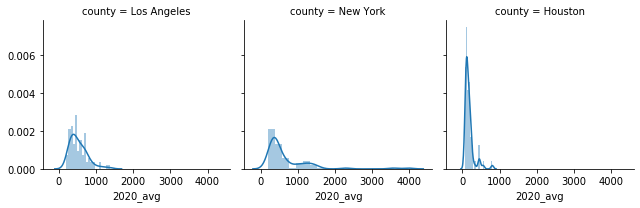

In [26]:
# Creating a histogram figure
fig = plt.figure(figsize=(10,5))

g = sns.FacetGrid(house_avg_df, col="county")
g.map(sns.distplot, "2020_avg", bins= 20)

# Show plot
plt.show()

The above histogram and descriptive statistics show that the mean of New York has a higher mean (690.22) than Los Angeles and Houston. New York has the highest average price/sqft with 3978.18, but Houston has the lowest average price/sqft with 61.63. New York has the largest IQR(Q3 - Q1) = (739.15 - 340.24), and it means that 50% New York houses have average price/sqft from 340.24 to 739.15. In contrast, Houston has the minimum IQR(Q3 - Q1) = (203.56 - 103.97), and it means that 50% G2 students have grades from 103.97 to 203.56.

### Next, I will draw a box chart to illustrate data concentration.

<Figure size 720x720 with 0 Axes>

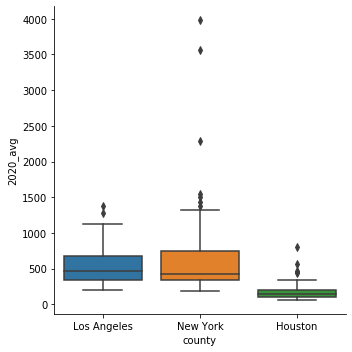

In [27]:
# Creating a new figure
fig = plt.figure(figsize=(10,10))

sns.catplot(x="county", y="2020_avg",  kind="box", data=house_avg_df)

# Show plot
plt.show()

The above boxpolt and descriptive statistics show as following:

The 2020 average price/sqft of properties in Los Angeles is skewed low side with min of 194.95, a max of 1382.48, and a standard deviation of 235.44. It has outliers, since 3 standard deviations above the mean(528.33) would be 1,234.65, but the max is 1382.48.

The 2020 average price/sqft of properties in New York is skewed low side with min of 189.57, a max of 3978.18, and a standard deviation of 665.54. It has many outliers, since 3 standard deviations above the mean(690.22) would be 2,686.84, but the max is 3978.18.

The 2020 average price/sqft of properties in Houston is skewed low side with min of 61.63, a max of 804.38, and a standard deviation of 125.73. It has many outliers, since 3 standard deviations above the mean(177.79) would be 554.98, but the max is 804.38.

The 2020 average price/sqft of properties in New York is higher than other two counties.

# Research Questions

## Q1: Does COVID-19 affects the price of the estate?

For this question, I want to study Whether the increasing or decreasing price of the property is related to the pandemic? By analyzing two data of three main cities,(New York City, Houston, and Los Angeles), people can use results to make decisions to invest in real estate.

Next, I will do the Data Preparation.

# Data Preparation
To get a sub dataset of Housing price

In [28]:
# Get a sub dataset
sub_house_avg_df = house_avg_df[["county", "prop_type", 
                                                    "2020_01_avg", "2020_02_avg", "2020_03_avg", "2020_04_avg", "2020_05_avg", 
                                                    "2020_06_avg", "2020_07_avg", "2020_08_avg", "2020_09_avg", 
                                                    "2020_10_avg", "2020_11_avg", "2020_12_avg"]]

To calculate the mean value for each counties

In [29]:
# Using group by county to calculate mean value
sub_county_mean_df = sub_house_avg_df.groupby("county").mean()
sub_county_mean_df

,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
county,,,,,,,,,,,,
Houston,177.791538,178.489846,178.433692,178.433692,178.326769,178.237231,178.351385,178.234462,177.971385,177.637385,177.603538,177.791538
Los Angeles,528.332584,528.332584,528.282247,527.654944,527.487640,526.645955,525.340449,524.082472,523.614607,519.774607,516.210337,517.516180
New York,690.224247,689.042877,689.013014,688.892603,688.702466,689.215068,686.154521,684.028356,682.443151,678.784384,677.374110,676.512466


Using bar chart to compare monthly average price of each counties.

<Figure size 720x720 with 0 Axes>

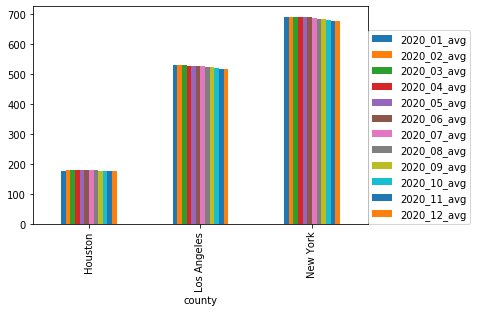

In [30]:
# Creating a new bar figure
fig = plt.figure(figsize=(10,10))

sub_county_mean_df.plot.bar()

plt.legend(loc=[1, 0])

# Show plot
plt.show()

The above bar chart and descriptive statistics show as following:

The monthly average price/sqft of properties in New York (all over 670) are higher than other Los Angeles and Houston, 510 and 170 respectively. The figure for month 12 is lower than the figure for month 1 in New York. The same situation can be seen in Los Angeles. But the monthly average price/sqft of properties in Houston has fluctuated.

Next, I will use line chart to illustrate.

<Figure size 720x720 with 0 Axes>

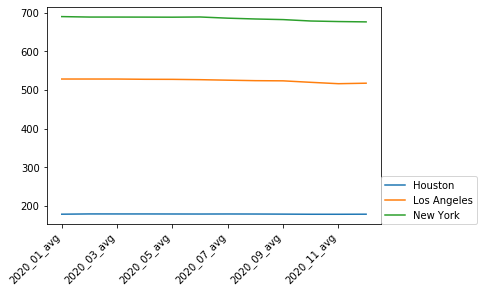

In [31]:
# Creating a new line figure
fig = plt.figure(figsize=(10,10))

sub_county_mean_df.T.plot.line()

plt.xticks(rotation=45, horizontalalignment='right')

plt.legend(loc=[1, 0])
# Show plot
plt.show()

From the above line chart we can see there are a decrease trend for the month average price/sqft in New York and Los Angeles.

# Exploratory Data Analysis

After finishing the Data Preparation, I will use line chart to illustrate them individually.

### First, I want to study the data of Los Angeles. 
Drawing a line chart to illustrate the monthly average price/sqft of 2020 of Los Angeles. And drawing a line chart to show the daily cases of COVID-19 of Los Angeles.

In [32]:
# Get the T matrix of sub_county_mean_df
t_sub_county_mean_df = sub_county_mean_df.T
t_sub_county_mean_df

county,Houston,Los Angeles,New York
2020_01_avg,177.791538,528.332584,690.224247
2020_02_avg,178.489846,528.332584,689.042877
2020_03_avg,178.433692,528.282247,689.013014
2020_04_avg,178.433692,527.654944,688.892603
2020_05_avg,178.326769,527.487640,688.702466
2020_06_avg,178.237231,526.645955,689.215068
2020_07_avg,178.351385,525.340449,686.154521
2020_08_avg,178.234462,524.082472,684.028356
2020_09_avg,177.971385,523.614607,682.443151
2020_10_avg,177.637385,519.774607,678.784384


In [33]:
# reset index and rename column name.
t_sub_county_mean_df = t_sub_county_mean_df.reset_index()
t_sub_county_mean_df = t_sub_county_mean_df.rename(columns={"index": "date"})
t_sub_county_mean_df.head(3)

county,date,Houston,Los Angeles,New York
0,2020_01_avg,177.791538,528.332584,690.224247
1,2020_02_avg,178.489846,528.332584,689.042877
2,2020_03_avg,178.433692,528.282247,689.013014


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

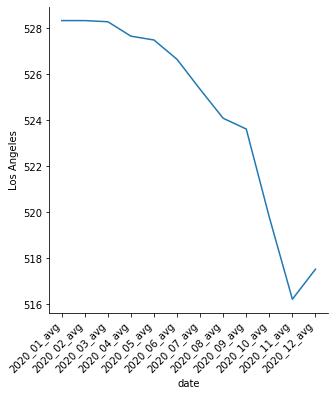

In [34]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 in Los Angeles.
plt.figure(figsize = (10,10))

sns.relplot(x="date", y="Los Angeles",  kind="line", data=t_sub_county_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

<Figure size 720x720 with 0 Axes>

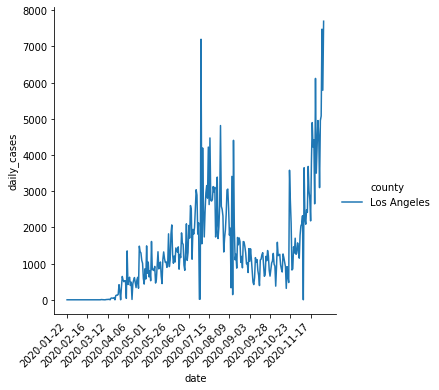

In [35]:
# Drawing a line chart to show the daily cases of COVID-19 in Los Angeles
plt.figure(figsize = (10, 10))
sns.relplot(x="date", y="daily_cases", hue="county", kind="line", data=
            covid_daily_cases_long_df[covid_daily_cases_long_df.county  == 'Los Angeles']);

dates = covid_daily_cases_long_df[covid_daily_cases_long_df.county == 'Los Angeles']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

From the above two line charts, we can see that the average price/sqft of House in Los Angeles have been falling from 528.28 to 517.51 since March, but the daily cases of COVID-19 have increased from 500 in September to near 8000 in December. Also, the average price/sqft of House has rebounded in December.

### Next, I will see the two data from New York. 

Drawing a line chart to illustrate the monthly average price/sqft of 2020 in New York. And drawing a line chart to show the daily cases of COVID-19 in New York.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

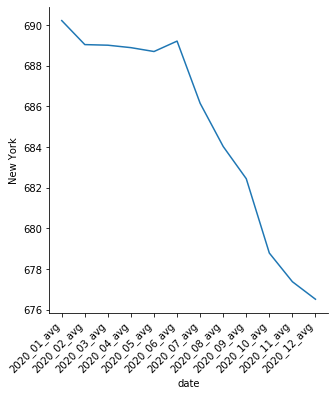

In [36]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 in New York
plt.figure(figsize = (10,10))

sns.relplot(x="date", y="New York",  kind="line", data=t_sub_county_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

<Figure size 720x720 with 0 Axes>

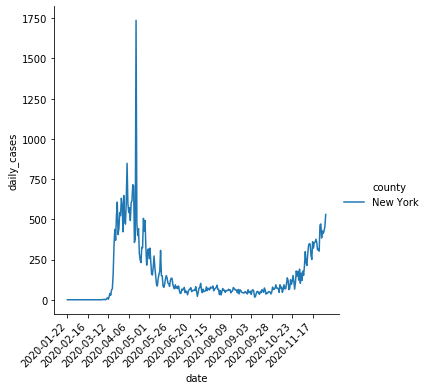

In [37]:
# Drawing a line chart to show the daily cases of COVID-19 in New York
plt.figure(figsize = (10, 10))
sns.relplot(x="date", y="daily_cases", hue="county", kind="line", data=
            covid_daily_cases_long_df[covid_daily_cases_long_df.county  == 'New York']);

dates = covid_daily_cases_long_df[covid_daily_cases_long_df.county == 'New York']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

The monthly average price/sqft figure of New York also shows a decreasing trend. Although the monthly average price/sqft rose to 689.21, since July the price has been falling to 676.51 in December. The daily cases of COVID-19 have two peaks. One peak is from March to late April. The other peak is from late October to early December. The daily cases reaches around 500 in early December.

### Third, I will study data of Houston. 

Using line chart to illustrate.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x0 with 0 Axes>

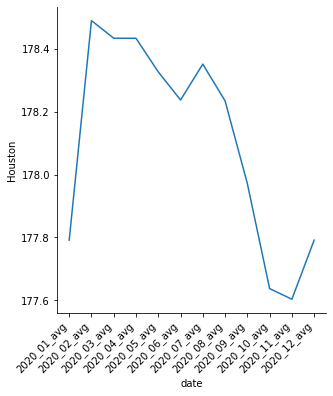

In [38]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 in Houston, Texas.
plt.figure(figsize = (10,0))

sns.relplot(x="date", y="Houston",  kind="line", data=t_sub_county_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

<Figure size 720x720 with 0 Axes>

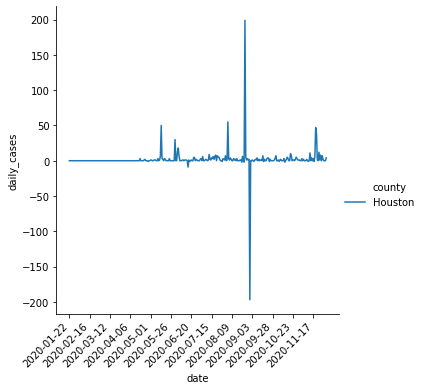

In [39]:
# Drawing a line chart to show the daily cases of COVID-19 in Houston, TX
plt.figure(figsize = (10, 10))
sns.relplot(x="date", y="daily_cases", hue="county", kind="line", data=
            covid_daily_cases_long_df[covid_daily_cases_long_df.county  == 'Houston']);

dates = covid_daily_cases_long_df[covid_daily_cases_long_df.county == 'Houston']['date']

new_dates = get_x_names(dates)
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

plt.show()

The monthly average price/sqft figure of Houston is between 177 and 179. The daily cases of COVID-19 are under 50. There are two peaks. One is over 200. Other is over negative 200. I think the negative 200 is used to adjust for incorrect data from the previous days.

### Using Quarterly price change percentate to show the price change.

Formula: (the average price/sqft of 1st/2nd/3rd/4th quarter) * 100 / (the average price/sqft of 2020)

In [40]:
# get a sub dataset
sub_house_avg_df2 = house_avg_df[["county", "2020_avg",
                                                    "2020_01_avg", "2020_02_avg", "2020_03_avg", "2020_04_avg", "2020_05_avg", 
                                                    "2020_06_avg", "2020_07_avg", "2020_08_avg", "2020_09_avg", 
                                                    "2020_10_avg", "2020_11_avg", "2020_12_avg"]]
sub_house_avg_df2.head(3)

,county,2020_avg,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
0,Los Angeles,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,378.63,378.63
1,Los Angeles,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,722.56,722.56
2,Los Angeles,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,613.34,613.34


Then, to calculate average price/sqft of the quaters.

In [41]:
# get mean of  Q1 - Q4 price/sqft
q1 = sub_house_avg_df2[["2020_01_avg","2020_02_avg","2020_03_avg"]]
q2 = sub_house_avg_df2[["2020_04_avg","2020_05_avg","2020_06_avg"]]
q3 = sub_house_avg_df2[["2020_07_avg","2020_08_avg","2020_09_avg"]]
q4 = sub_house_avg_df2[["2020_10_avg","2020_11_avg","2020_12_avg"]]

#axis 0 is col，1 is row
sub_house_avg_df2["Q1_avg"] = q1.mean(axis=1)
sub_house_avg_df2["Q2_avg"] = q2.mean(axis=1)
sub_house_avg_df2["Q3_avg"] = q3.mean(axis=1)
sub_house_avg_df2["Q4_avg"] = q4.mean(axis=1)

sub_house_avg_df3 = sub_house_avg_df2[["county", "2020_avg","Q1_avg","Q2_avg","Q3_avg","Q4_avg"]]
sub_house_avg_df3

D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,county,2020_avg,Q1_avg,Q2_avg,Q3_avg,Q4_avg
0,Los Angeles,376.38,376.38,376.380000,376.380000,377.880000
1,Los Angeles,718.43,718.43,718.430000,718.430000,721.183333
2,Los Angeles,622.91,622.91,622.910000,622.910000,616.530000
3,Los Angeles,309.53,309.53,309.530000,343.683333,372.010000
4,Los Angeles,487.40,487.40,487.400000,487.400000,487.400000
...,...,...,...,...,...,...
222,New York,1314.22,1314.22,1314.220000,1314.220000,1314.220000
223,Los Angeles,194.95,194.95,194.950000,194.950000,176.580000
224,New York,532.11,532.11,526.096667,514.070000,514.070000
225,Houston,184.47,184.47,184.470000,184.470000,184.470000


I get 227 properties' quarters data.

### To calculate the quarterly price change rate for each counties.

In [42]:
# get mean of average price/sqft for each county
sub_house_avg_df3_mean = sub_house_avg_df3.groupby("county").mean()

In [43]:
# calculate Quarterly price change rate
# Formula: (the average price/sqft of 1st/2nd/3rd/4th quarter) * 100 / (the average price/sqft of 2020)
sub_house_avg_df3_mean["Q1_change_pct"] = (sub_house_avg_df3_mean["Q1_avg"] - sub_house_avg_df3_mean["2020_avg"]) * 100 / sub_house_avg_df3_mean["2020_avg"]
sub_house_avg_df3_mean["Q2_change_pct"] = (sub_house_avg_df3_mean["Q2_avg"] - sub_house_avg_df3_mean["2020_avg"]) * 100 / sub_house_avg_df3_mean["2020_avg"]
sub_house_avg_df3_mean["Q3_change_pct"] = (sub_house_avg_df3_mean["Q3_avg"] - sub_house_avg_df3_mean["2020_avg"]) * 100 / sub_house_avg_df3_mean["2020_avg"]
sub_house_avg_df3_mean["Q4_change_pct"] = (sub_house_avg_df3_mean["Q4_avg"] - sub_house_avg_df3_mean["2020_avg"]) * 100 / sub_house_avg_df3_mean["2020_avg"]


In [44]:
sub_house_avg_df3_mean

,2020_avg,Q1_avg,Q2_avg,Q3_avg,Q4_avg,Q1_change_pct,Q2_change_pct,Q3_change_pct,Q4_change_pct
county,,,,,,,,,
Houston,177.791538,178.238359,178.332564,178.185744,177.677487,0.251317,0.304303,0.221723,-0.064149
Los Angeles,528.332584,528.315805,527.262846,524.345843,517.833708,-0.003176,-0.202474,-0.754589,-1.987172
New York,690.224247,689.426712,688.936712,684.208676,677.556986,-0.115547,-0.186539,-0.871539,-1.835238


Using bar chart to illustrate quarterly price change rate for each counties.

<Figure size 720x360 with 0 Axes>

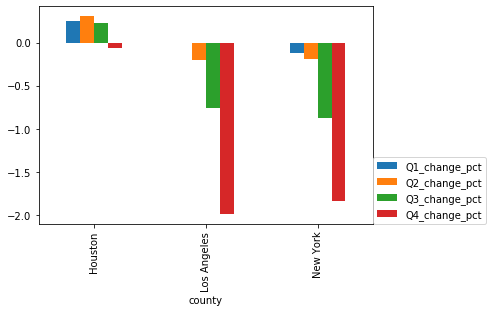

In [45]:
# Creating a new figure
fig = plt.figure(figsize=(10,5))

sub_house_avg_df3_mean[['Q1_change_pct','Q2_change_pct','Q3_change_pct','Q4_change_pct']].plot.bar()

plt.legend(loc=[1, 0])
# Show plot
plt.show()

From the above bar chart we can see as following:


In Houston, that the average price/sqft increased in the first three quarters, but fell in the fourth quarter.


By contrary, the average price/sqft falled in the all four quaters in Los Angelese and New York.

# To draw a map
- This map can show the change percentage of price/sqft of the 4th quarter in 2020 for three places.

### Perpare data to draw map

In [46]:
# to perpare data
# choose three counties with state and state_code
sub_covid_3cities_df = covid_3cities_df[['fips','county','state','state_code']]

sub_covid_3cities_df = sub_covid_3cities_df.drop_duplicates(['fips', 'county','state','state_code'], keep='first', inplace=False)

sub_covid_3cities_df.fips= sub_covid_3cities_df.fips.astype(int)
sub_covid_3cities_df.set_index(["county"], inplace=True)
sub_covid_3cities_df

,fips,state,state_code
county,,,
Los Angeles,6037,California,CA
New York,36061,New York,NY
Houston,48225,Texas,TX


In [47]:
# the change percentage of price/sqft of the 4 quarters in 2020
sub_house_avg_df3_mean

,2020_avg,Q1_avg,Q2_avg,Q3_avg,Q4_avg,Q1_change_pct,Q2_change_pct,Q3_change_pct,Q4_change_pct
county,,,,,,,,,
Houston,177.791538,178.238359,178.332564,178.185744,177.677487,0.251317,0.304303,0.221723,-0.064149
Los Angeles,528.332584,528.315805,527.262846,524.345843,517.833708,-0.003176,-0.202474,-0.754589,-1.987172
New York,690.224247,689.426712,688.936712,684.208676,677.556986,-0.115547,-0.186539,-0.871539,-1.835238


In [48]:
# combin the two dataframes
state_data_result = pd.concat([sub_house_avg_df3_mean, sub_covid_3cities_df], axis=1)

# fips is the code of county
state_data_result[['fips', 'Q4_change_pct']]

,fips,Q4_change_pct
Houston,48225,-0.064149
Los Angeles,6037,-1.987172
New York,36061,-1.835238


### To draw a map

In [69]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_geo = f'{url}/us_counties_20m_topo.json'

# set color
# the max is red, the min is white
colorscale = branca.colormap.linear.YlOrRd_09.scale(state_data_result.Q4_change_pct.min(), state_data_result.Q4_change_pct.max())

# use the change rate of Q4 to show
q4_series = state_data_result.set_index('fips')['Q4_change_pct']

def style_function(feature):
    q4 = q4_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if q4 is None else colorscale(q4)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=4
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)

# show map
m

The map shows that Texas has a higher the monthly change percentage of price/sqft of the 4 quarters in 2020 than New York and California.

# Research Questions

# Q2: What types of houses have been most affected, Muti-family, Single-family, or Condos?


For this question, I want to study Whether the increasing or decreasing price of the property is related to the pandemic? By analyzing two data of three main type of house,(Muti-family, Single-family, and Condos), people can use results to make decisions to invest in real estate.

First, I want to prepara data.

# Data Preparation
- Get a sub dataset of Housing Data to analyze types of house

In [50]:
# Get a sub dataset
sub_house_type_avg_df = house_avg_df[["prop_type", 
                                                    "2020_01_avg", "2020_02_avg", "2020_03_avg", "2020_04_avg", "2020_05_avg", 
                                                    "2020_06_avg", "2020_07_avg", "2020_08_avg", "2020_09_avg", 
                                                    "2020_10_avg", "2020_11_avg", "2020_12_avg"]]

In [51]:
sub_house_type_mean_df = sub_house_type_avg_df.groupby("prop_type").mean()
sub_house_type_mean_df

,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
prop_type,,,,,,,,,,,,
condo,588.723023,588.250581,588.194186,588.189302,588.092442,588.705349,587.416395,585.490581,585.401047,581.323488,580.026860,579.717907
multi_family,409.342295,408.594590,408.558033,408.406557,408.078361,407.752131,404.739508,403.083443,401.454426,399.258197,396.310328,395.019672
single_family,417.054500,417.621875,417.581500,416.894500,416.802375,415.850875,415.381250,415.279625,414.437250,412.613250,410.975250,413.110750


Then using bar chart to compare each type of house.

<Figure size 720x720 with 0 Axes>

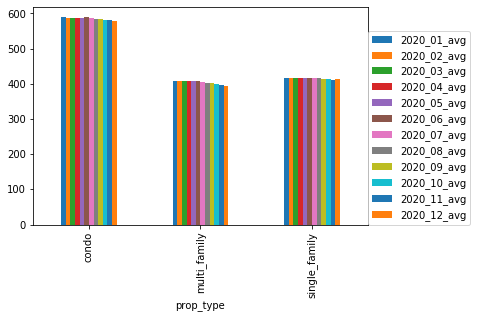

In [52]:
# Creating a new bar figure
fig = plt.figure(figsize=(10,10))

sub_house_type_mean_df.plot.bar()

plt.legend(loc=[1, 0])

# Show plot
plt.show()

The above bar chart and descriptive statistics show as following:

The month average price/sqft of properties of Condo (all over 580) are higher than Multi-family and Single-family, around 400 and around 410 respectively. The figure of month 12 is lower than the figure of month 1 of Multi-family. The figure of Multi-family was no significant change. But the month average price/sqft of properties of Condo has fluctuation.

Next, I will use line chart to illustrate.

<Figure size 720x720 with 0 Axes>

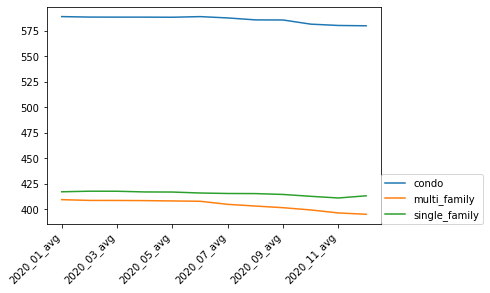

In [53]:
# Creating a new line figure
fig = plt.figure(figsize=(10,10))

sub_house_type_mean_df.T.plot.line()

plt.xticks(rotation=45, horizontalalignment='right')

plt.legend(loc=[1, 0])
# Show plot
plt.show()

From the above line chart, we can see there is a decreasing trend for the monthly average price/sqft in all three types of houses. But the monthly average price/sqft of single-family has reincreased after November.

# Exploratory Data Analysis
After finishing the Data Preparation, I will use line chart to illustrate them individually.

First, I want to study the data of Condo. Drawing a line chart to illustrate the monthly average price/sqft of 2020 of Condo. And drawing a line chart to show the cumulative cases of COVID-19 of Condo.

### Get sud dataset of COVID-19 and group by date to get sum cumulative cases of the U.S.

In [54]:
# Get a sub dataset of cumulate cases of COVID-19 of U.S. by date
covid19_us_date_cases_df = covid_all_df[['date', 'cases']].groupby('date').sum()
covid19_us_date_cases_df = covid19_us_date_cases_df.reset_index()
covid19_us_date_cases_df = covid19_us_date_cases_df.rename(columns={"index": "date"})
covid19_us_date_cases_df.head(3)

,date,cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2


In [55]:
covid19_us_date_cases_df.shape

(317, 2)

### Get daily cases of COVID-19 of U.S.

In [56]:
# Get a daily cases of COVID-19 of U.S.

us_cum_daily_df = covid19_us_date_cases_df['cases']
diff_dc = np.diff(covid19_us_date_cases_df['cases'])
us_daily_cases = np.append(covid19_us_date_cases_df['cases'][:1], diff_dc)
us_daily_df = pd.DataFrame(us_daily_cases, index=covid19_us_date_cases_df['date'], columns=['U.S. Daily Cases'])
us_daily_df = us_daily_df.reset_index()
us_daily_df.head(3)

,date,U.S. Daily Cases
0,2020-01-22,1
1,2020-01-23,0
2,2020-01-24,1


In [57]:
us_daily_df.describe()

,U.S. Daily Cases
count,317.000000
mean,44604.343849
std,43818.743951
min,0.000000
25%,19456.000000
50%,34305.000000
75%,56796.000000
max,217664.000000


In [58]:
us_daily_df.shape

(317, 2)

### Get sub dataset of houses with three property types. 

In [59]:
# Get the T matrix of sub_county_mean_df
t_sub_house_type_mean_df = sub_house_type_mean_df.T

# reset index and rename column name.
t_sub_house_type_mean_df = t_sub_house_type_mean_df.reset_index()
t_sub_house_type_mean_df = t_sub_house_type_mean_df.rename(columns={"index": "date"})
t_sub_house_type_mean_df

prop_type,date,condo,multi_family,single_family
0,2020_01_avg,588.723023,409.342295,417.054500
1,2020_02_avg,588.250581,408.594590,417.621875
2,2020_03_avg,588.194186,408.558033,417.581500
3,2020_04_avg,588.189302,408.406557,416.894500
4,2020_05_avg,588.092442,408.078361,416.802375
5,2020_06_avg,588.705349,407.752131,415.850875
6,2020_07_avg,587.416395,404.739508,415.381250
7,2020_08_avg,585.490581,403.083443,415.279625
8,2020_09_avg,585.401047,401.454426,414.437250
9,2020_10_avg,581.323488,399.258197,412.613250


### After data perparing, I will use line chart to illustrate each data of house type

Draw a line chart for Condo

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

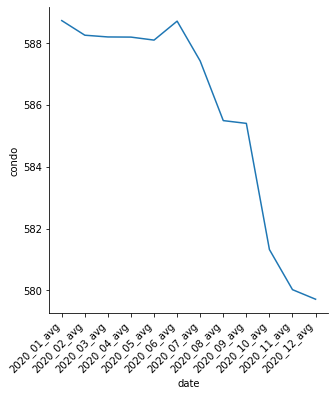

In [60]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 of Condo.
plt.figure(figsize = (10,10))

sns.relplot(x="date", y="condo",  kind="line", data=t_sub_house_type_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

Draw a line chart for Multi-family.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

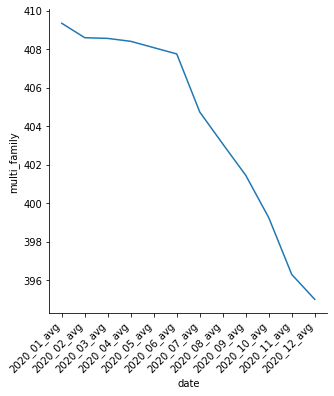

In [61]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 of Multi-family.
plt.figure(figsize = (10,10))

sns.relplot(x="date", y="multi_family",  kind="line", data=t_sub_house_type_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

Draw a line chart for Single-family

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x720 with 0 Axes>

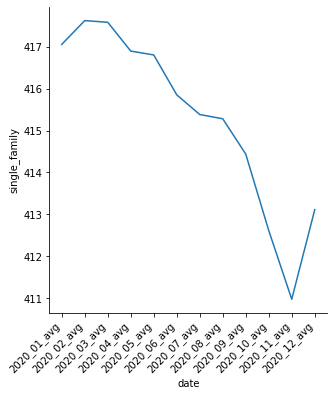

In [62]:
# Drawing a line chart to illustrate the monthly average price/sqft of 2020 of single-family.
plt.figure(figsize = (10,10))

sns.relplot(x="date", y="single_family",  kind="line", data=t_sub_house_type_mean_df);

plt.xticks(rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

Using line chart to illustrate the daily cases of COVID-19 in U.S.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 720x360 with 0 Axes>

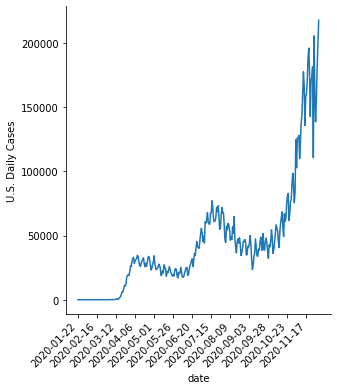

In [63]:
# Drawing a line chart to show the daliy cases of COVID-19 in U.S.
plt.figure(figsize = (10,5))

sns.relplot(x="date", y="U.S. Daily Cases", kind="line", data=us_daily_df);

new_dates = get_x_names(us_daily_df['date'])
    
plt.xticks(new_dates,rotation=45, horizontalalignment='right')

# Show the new figure
plt.show

From the above two line charts, we can see as following

The average price/sqft of Condo has been falling from over 590 to below 580 since June. 

The average price/sqft of Multi_family has been falling from over 409 to around 395 since June. 

The average price/sqft of Single_family has been increased to over 418 in March, but it has fallen rapidly to 411 in November. In December but it rose to 413. 

The daily cases of COVID-19 show an upward trend. It has three peaks. The first peak is in the middle of April with around 40,000. The second peak is in the middle of July with around 75,000. The third is from late October to December with over 200,000.

### Next, I use Quarterly price change percentate to show the price change in 2020.

Formula: (the average price/sqft of 1st/2nd/3rd/4th quarter) * 100 / (the average price/sqft of 2020)

In [64]:
# get a sub dataset
sub_house_avg_df4 = house_avg_df[["prop_type", "2020_avg",
                                                    "2020_01_avg", "2020_02_avg", "2020_03_avg", "2020_04_avg", "2020_05_avg", 
                                                    "2020_06_avg", "2020_07_avg", "2020_08_avg", "2020_09_avg", 
                                                    "2020_10_avg", "2020_11_avg", "2020_12_avg"]]
sub_house_avg_df4.head(3)

,prop_type,2020_avg,2020_01_avg,2020_02_avg,2020_03_avg,2020_04_avg,2020_05_avg,2020_06_avg,2020_07_avg,2020_08_avg,2020_09_avg,2020_10_avg,2020_11_avg,2020_12_avg
0,multi_family,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,376.38,378.63,378.63
1,single_family,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,718.43,722.56,722.56
2,condo,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,622.91,613.34,613.34


In [65]:
# get mean of  Q1 - Q4 price/sqft
q1 = sub_house_avg_df4[["2020_01_avg","2020_02_avg","2020_03_avg"]]
q2 = sub_house_avg_df4[["2020_04_avg","2020_05_avg","2020_06_avg"]]
q3 = sub_house_avg_df4[["2020_07_avg","2020_08_avg","2020_09_avg"]]
q4 = sub_house_avg_df4[["2020_10_avg","2020_11_avg","2020_12_avg"]]

#axis 0 is col，1 is row
sub_house_avg_df4["Q1_avg"] = q1.mean(axis=1)
sub_house_avg_df4["Q2_avg"] = q2.mean(axis=1)
sub_house_avg_df4["Q3_avg"] = q3.mean(axis=1)
sub_house_avg_df4["Q4_avg"] = q4.mean(axis=1)

sub_house_type_q_avg_df = sub_house_avg_df4[["prop_type", "2020_avg","Q1_avg","Q2_avg","Q3_avg","Q4_avg"]]

# get mean of average price/sqft for each prop_type
sub_type_q_avg_df = sub_house_type_q_avg_df.groupby("prop_type").mean()
sub_type_q_avg_df

D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,2020_avg,Q1_avg,Q2_avg,Q3_avg,Q4_avg
prop_type,,,,,
condo,588.723023,588.389264,588.329031,586.102674,580.356085
multi_family,409.342295,408.831639,408.079016,403.092459,396.862732
single_family,417.054500,417.419292,416.515917,415.032708,412.233083


In [66]:
# calculate Quarterly price change rate
# Formula: (the average price/sqft of 1st/2nd/3rd/4th quarter) * 100 / (the average price/sqft of 2020)
sub_type_q_avg_df["Q1_change_pct"] = (sub_type_q_avg_df["Q1_avg"] - sub_type_q_avg_df["2020_avg"]) * 100 / sub_type_q_avg_df["2020_avg"]
sub_type_q_avg_df["Q2_change_pct"] = (sub_type_q_avg_df["Q2_avg"] - sub_type_q_avg_df["2020_avg"]) * 100 / sub_type_q_avg_df["2020_avg"]
sub_type_q_avg_df["Q3_change_pct"] = (sub_type_q_avg_df["Q3_avg"] - sub_type_q_avg_df["2020_avg"]) * 100 / sub_type_q_avg_df["2020_avg"]
sub_type_q_avg_df["Q4_change_pct"] = (sub_type_q_avg_df["Q4_avg"] - sub_type_q_avg_df["2020_avg"]) * 100 / sub_type_q_avg_df["2020_avg"]

sub_type_q_avg_df

,2020_avg,Q1_avg,Q2_avg,Q3_avg,Q4_avg,Q1_change_pct,Q2_change_pct,Q3_change_pct,Q4_change_pct
prop_type,,,,,,,,,
condo,588.723023,588.389264,588.329031,586.102674,580.356085,-0.056692,-0.066923,-0.445090,-1.421201
multi_family,409.342295,408.831639,408.079016,403.092459,396.862732,-0.124750,-0.308612,-1.526799,-3.048686
single_family,417.054500,417.419292,416.515917,415.032708,412.233083,0.087469,-0.129140,-0.484779,-1.156064


Using bar chart to illustrate the quaterly data

<Figure size 720x360 with 0 Axes>

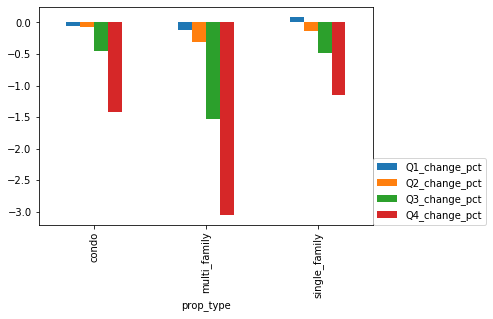

In [67]:
# Creating a new figure
fig = plt.figure(figsize=(10,5))

sub_type_q_avg_df[['Q1_change_pct','Q2_change_pct','Q3_change_pct','Q4_change_pct']].plot.bar()

plt.legend(loc=[1, 0])
# Show plot
plt.show()

From the above bar chart we can see as follows:

The average price/sqft of single_family increased in the first quarter but fell in the next three quarters.

The average price/sqft of mulit_family and condo fell in all four quarters.

# Research Questions - Answers
As stated above my questions were:
- Q1: Does COVID-19 affects the price of the estate?
- Q2:What types of houses have been most affected, Muti-family, Single-family, or Condos?

# Answer for Q1:Does COVID-19 affects the price of the estate?
The COVID-19 has a possitive influence on the price/sqft of Los Angeles. With the daily cases increasing to over 7500 from early November. The property market is Rebounding. The price/sqft of Los Angeles is over 517.

The COVID-19 has a possitive influence on the price/sqft of New York. From January to June, the price/sqft of New York is stability, because COVID-19 is under better control. The daily cases are around 300 cases. The price/sqft of New York has fallen to 676 because the daily cases have increased to over 500.

The COVID-19 does not affect the price/sqft in Houston. The change of the price/sqft is between 177 and 178. Even though the picture seems to be trending up, the change is too small.

# Answer for Q2:What types of houses have been most affected, Muti-family, Single-family, or Condos?

The COVID-19 has a possitive influence on the price/sqft of single-family. In March, the price/sqft of single-family has risen to 418, because of the outbreak of a pandemic. The daily COVID-19 cases have reached over 40000. But the price has fallen to 411 because COVID-19 is under better control from June to late October.

The COVID-19 has a negative influence on the price/sqft of the condo. From January to June, the price/sqft of the condo is between 588 to 589. But the price/sqft of the condo has fallen to 579 because the 3rd peak of daily COVID-19 cases has reached over 200,000.

The COVID-19 has a negative influence on the price/sqft of multi-family. The price/sqft of multi-family kept fall to 395. Because the 3rd peak of daily COVID-19 cases has reached over 200,000.

With the cumulative cases of COVID-19 increasing, the price/sqft of three type of houses has fallen. Especially, the price/sqft of multi-family of the 4th quarter has fallen near -3% comparing the average price of 2020.

# Conclusion
The COVID-19 affects the price/sqft of big cities (New York and Los Angeles) obivously. The COVID-19 has a negative influence on the price/sqft of Condos and Multi-family, but it has a possitive influence on the price/sqft of single-family.